<a href="https://colab.research.google.com/github/banddanalytics/Machine-Learning-Projects/blob/main/Hypermarket_Sales_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

**Download link:** https://www.kaggle.com/devashish0507/big-mart-sales-prediction

Libraries Used

<li>pandas
<li>matplotlib
<li>seaborn
<li>scikit-learn

Algorithms Used

<li>Linear Regression
<li>Ridge
<li>Lasso
<li>Decision Tree
<li>Random Forest
<li>Extra Tress


## Importing Modules

In [ ]:
# Importing Dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the data

In [ ]:
# Importing data and json API from kaggle

import os
os.environ['KAGGLE_USERNAME'] = "banddanalytics" # My Kaggle Username from the json file
os.environ['KAGGLE_KEY'] = "54e1dacacd4d083c3533b0d29b54539f" # My Kaggle API Key from the json file
!kaggle datasets download -d devashish0507/big-mart-sales-prediction # API copied from Kaggle

big-mart-sales-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzipping the data

from zipfile import ZipFile

file_name = "/content/big-mart-sales-prediction.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done unzipping data')

Done unzipping data


In [ ]:
# Reading the CSV File
df = pd.read_csv('/content/Train.csv') 

In [ ]:
df.shape

(8523, 12)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We see we have missing values in Item Weight as the rest are 8523

In [ ]:
# Data type attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Checking for unique values in the dataset

df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the dataset

In [ ]:
# Checking for null values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Checking for categorical attributes
# From the data we have, odject values are categorical attributes
cat_col = []
for x in df.dtypes.index: 
  if df.dtypes[x] == 'object': 
    cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# We will remove the Item and Outlet identifiers from our list as we do not need them
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# Print the categorical columns
for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

We need to combine the data in the Item_Fat_Content column so that we dont have repeated information

In [ ]:
# Filling the missing values
# We will calculate the mean based on the categorical columns
item_weight_mean = df.pivot_table(values = "Item_Weight", index = "Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [ ]:
# Now we need to get the information of the missing values;
# Like which row has the missing values.
# We will store that info in a new variable and represent them using booleans (true/false)
missing_values = df['Item_Weight'].isnull()
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
# Now lets fill the Item_Weight missing values
for i, item in enumerate(df['Item_Identifier']):
  if missing_values[i]:
    if item in item_weight_mean:
      df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
    else:
      df['Item_Weight'][i] = 0

In [ ]:
# Checking to see if there are any missing values left
df['Item_Weight'].isnull().sum()

0

In [ ]:
# Now lets fill the Outlet Size missing values
Outlet_Size_mode = df.pivot_table(
    values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0])
)
Outlet_Size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values1 = df['Outlet_Size'].isnull()
df.loc[missing_values1, 'Outlet_Size'
] = df.loc[missing_values1, 'Outlet_Type'].apply(lambda x: Outlet_Size_mode[x]) 

In [ ]:
# Checking to see if there are any missing values left
df['Outlet_Size'].isnull().sum()

0

In [ ]:
sum(df['Item_Visibility'] == 0)

526

In [ ]:
# Replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace = True)

In [ ]:
sum(df['Item_Visibility'] == 0)

0

In [ ]:
# Combine item 'fat content' in the list
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(
    {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Creating New Attributes

In [ ]:
# List all the Item Identifiers
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:
# Creating new attributes; Food, Non-Consumable, Drinks to clearly identify the products by type
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [ ]:
# Creating new attributes; Low Fat, Regular, Non-Edible to classify the products 
df.loc[df['New_Item_Type'] == 'Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

we have placed all the non-consumables from the item fat content list in the non-edible category

In [ ]:
# Create small values for establishment year (Annual Attribute)
# The lastest outlet year minus the corresponding value for establishment year.
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [ ]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

The model won't be affected by this

## Exploratory Data Analysis

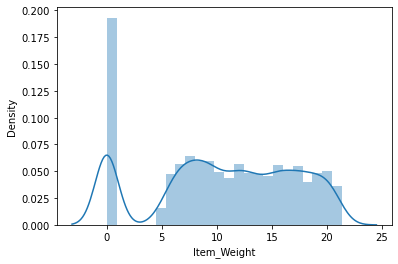

In [325]:
# Plot a numerical value
sns.distplot(df['Item_Weight'])

### Distribution of Data Categories

In [ ]:
# Item_Weight
import plotly.express as px
fig = px.histogram(df, x= "Item_Weight")
fig.show(renderer="colab")

In [ ]:
# Item_Visibility
fig = px.histogram(df, x= "Item_Visibility")
fig.show(renderer="colab")

In [ ]:
# Item_MRP
fig = px.histogram(df, x= "Item_MRP")
fig.show(renderer="colab")

In [ ]:
# Item_Outlet_Sales
fig = px.histogram(df, x= "Item_Outlet_Sales")
fig.show(renderer="colab")

In [ ]:
# Log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

In [ ]:
# This shows the average / mean of Item_Outlet_Sales
fig = px.histogram(df, x= "Item_Outlet_Sales")
fig.show(renderer="colab")

In [ ]:
# Item_Fat_Content distribution
fig = px.histogram(df, x="Item_Fat_Content", color="Item_Fat_Content")
fig.show( renderer = "colab")

In [ ]:
# Item_Type distribution
fig = px.histogram(df, x="Item_Type", color="Item_Type")
fig.show( renderer = "colab")

In [ ]:
# Outlet_Establishment_Year distribution
fig = px.histogram(df, 
                   x="Outlet_Establishment_Year", 
                   color="Outlet_Establishment_Year")
fig.show( renderer = "colab")

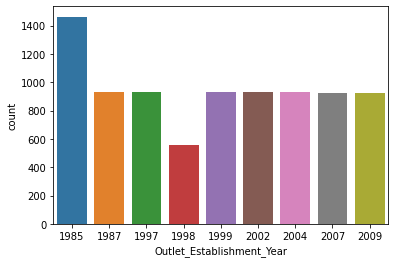

In [ ]:
sns.countplot(df['Outlet_Establishment_Year'])

In [ ]:
# Outlet_Size distribution
fig = px.histogram(df, x='Outlet_Size')
fig.show( renderer = "colab")

In [ ]:
# Outlet_Location_Type distribution
fig = px.histogram(df, 
                   x="Outlet_Location_Type", 
                   color="Outlet_Location_Type")
fig.show( renderer = "colab")

In [ ]:
# Outlet_Type distribution
fig = px.histogram(df, 
                   x="Outlet_Type", 
                   color="Outlet_Type")
fig.show( renderer = "colab")

## Corelation Matrix

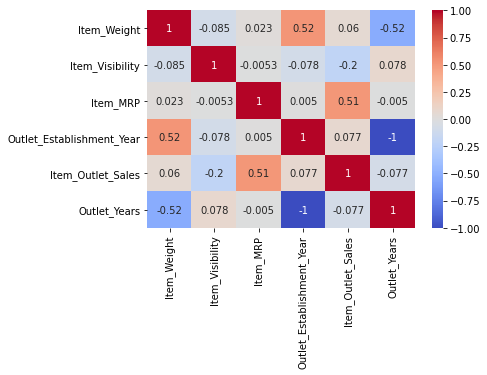

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

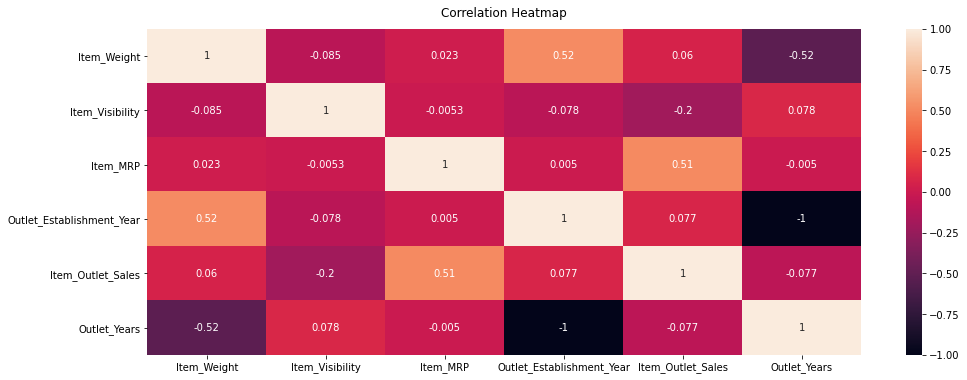

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Label Encoding

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


In [ ]:
# Changing the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size',
           'Outlet_Location_Type','Outlet_Type','New_Item_Type']

for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


Observation:

The following categories have changed to numerical values.
- 'Item_Fat_Content'
- 'Item_Type'
- 'Outlet_Size'
- 'Outlet_Location_Type'
- 'Outlet_Type'
- 'New_Item_Type'

## One Hot Encoding

In [ ]:
# Create a new column for each category
# This will improve model prediction.

df = pd.get_dummies(df, columns = ['Item_Fat_Content','Outlet_Size',
           'Outlet_Location_Type','Outlet_Type','New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


Now we have 26 features / columns. If we had more than 100 features, it would take more time to train our model.

when the corresponding location type is present for a particular feature, it will be represented by "1". And if not, it will be represented by "0".

## Input Split

In [ ]:
# Lets split the input and output variables in separate variables
X = df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier',
                     'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

## Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(model, X, y):
  # train the model
  model.fit(X,y)

  # predict the training set
  pred = model.predict(X)

  # Perform Cross - Validation
  cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
  cv_score = np.abs(np.mean(cv_score))

  print("Model Report")
  print("MSE:", mean_squared_error(y,pred))
  print("CV Score:", cv_score)

### Visualizing coefficients for multiple linear regression (MLR)

Model Report
MSE: 0.2880792800923671
CV Score: 0.28916873271141696


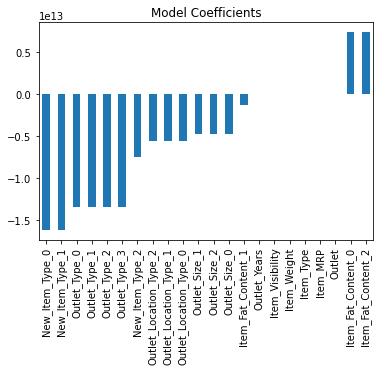

In [ ]:
# Here each bar indicates the coefficients of our linear regression model for each input feature.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

### Linear Regression

In [ ]:
# Plotly visualization
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear Regression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature', y='Linear coefficient'),
    title='Model Coefficients'
)
fig.show(renderer = "colab")


Model Report
MSE: 0.2880792800923671
CV Score: 0.28916873271141696


### Ridge Model

In [315]:
# Ridge
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature'),
    title='Model Coefficients'
)
fig.show(renderer = "colab")

Model Report
MSE: 0.42809051122904557
CV Score: 0.42903143695834534


### Lasso Model

In [316]:
# Lasso
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()

colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature'),
    title='Model Coefficients'
)
fig.show(renderer = "colab")

Model Report
MSE: 0.7628688679102087
CV Score: 0.7630789166281843


### Decision Tree Regressor Model

In [317]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)

colors = ['Positive' if c > 0 else 'Negative' for c in model.feature_importances_]

fig = px.bar(
    x=X.columns, y=model.feature_importances_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature'),
    title='Feature Importance'
)
fig.show(renderer = "colab")

Model Report
MSE: 9.251544668064852e-11
CV Score: 0.5785188054892287


### Random Forest Regressor Model

In [319]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)

colors = ['Positive' if c > 0 else 'Negative' for c in model.feature_importances_]

fig = px.bar(
    x=X.columns, y=model.feature_importances_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature'),
    title='Feature Importance'
)
fig.show(renderer = "colab")

Model Report
MSE: 0.0422405084904939
CV Score: 0.3100990688519861


### Extra Trees Regressor Model

In [322]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)

colors = ['Positive' if c > 0 else 'Negative' for c in model.feature_importances_]

fig = px.bar(
    x=X.columns, y=model.feature_importances_, color=colors,
    color_discrete_sequence=['red', 'blue'],
    labels=dict(x='Feature'),
    title='Feature Importance'
)
fig.show(renderer = "colab")

Model Report
MSE: 1.5773112532150085e-12
CV Score: 0.3318890375497343


## Observations

Linear Regression is the best model

**Linear Regression**

- CV Score: 0.28916873271141696

RandomForestRegressor
- CV Score: 0.3100990688519861

ExtraTreesRegressor

- CV Score: 0.3318890375497343

Ridge
- CV Score: 0.42903143695834534

DecisionTreeRegressor
- CV Score: 0.5785188054892287

Lasso
- CV Score: 0.7630789166281843

